# CUSTOMER SEGMENTATION - STEP-BY-STEP TUTORIAL

##### We will consider an case study for hotel booking companies like say booking.com, agoda.com, etc. #####

# Data Description 
'date_time': Date of booking
'user_location_country', 'user_location_region','user_location_city':  user related geographic information 
'orig_destination_distance': destination info
'is_mobile': whether cust. has booked using mobile or not
'is_package': whether cust. has opted for any package
'channel': channel used by customer
'srch_ci': check-in date
'srch_co': check-out date
'srch_adults_cnt': num of persons
'srch_children_cnt': children count
'srch_rm_cnt': num of rooms
'is_booking': whether customer has booked or not  

In [123]:
# let's get started:-
__author__ = 'Ajay Arunachalam'

# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
import pydot
%matplotlib inline

In [124]:
# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [125]:
# Load the booking dataset
try:
    sample = pd.read_csv('sample', error_bad_lines=False)
    print("Booking dataset has {} samples with {} features each.".format(*sample.shape))
    print("Feature names:")
    print(sample.columns)
except:
    print("Dataset could not be loaded. Check whether csv is available")

Booking dataset has 100000 samples with 25 features each.
Feature names:
Index(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster'], dtype='object')


In [126]:
# drop the column 'Unnamed: 0'
sample = sample.drop('Unnamed: 0',1)

In [127]:
# create a 'target' column for our own convenience
sample['target'] = sample['is_booking'].astype('category')
print("Target variable: '{}' -> '{}'".format('is_booking', 'target'))

Target variable: 'is_booking' -> 'target'


# step1:-  lets explore the data

In [128]:
##################### peek into data s#####################
sample.head(2)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,target
0,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,0
1,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,0


In [129]:
sample.dtypes

date_time                      object
site_name                       int64
posa_continent                  int64
user_location_country           int64
user_location_region            int64
user_location_city              int64
orig_destination_distance     float64
user_id                         int64
is_mobile                       int64
is_package                      int64
channel                         int64
srch_ci                        object
srch_co                        object
srch_adults_cnt                 int64
srch_children_cnt               int64
srch_rm_cnt                     int64
srch_destination_id             int64
srch_destination_type_id        int64
is_booking                      int64
cnt                             int64
hotel_continent                 int64
hotel_country                   int64
hotel_market                    int64
hotel_cluster                   int64
target                       category
dtype: object

In [130]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63915 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99878 non-null object
srch_co                      99878 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
srch_destination_type

In [131]:
# check the booking dates i.e., first & last day of booking
print("First booking period",sample['date_time'].min()), print("Last booking period",sample['date_time'].max())

First booking period 2013-01-07 00:33:47
Last booking period 2014-12-31 23:47:14


(None, None)

In [10]:
# check if missing values present
def missing(x):
    return sum(x.isnull())

In [132]:
#Applying per column:
print("Missing values per column:")
print(sample.apply(missing, axis=0))   #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(sample.apply(missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

# we observe that 3 variables have missing values, i.e., orig_destination_distance, srch_ci, srch_co

Missing values per column:
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
target                           0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    1
dtype: int64


In [133]:
sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'target'], dtype='object')

In [134]:
# define function to check unique values for all columns of the dataset excluding the new created target column
# unique counts
def unique_counts(sample):
    for i in sample.columns[:-1]:
        count = len(sample[i].unique().tolist())
        print(i, ": ", count)

In [135]:
# check unique counts for each attributes in the dataset
print("Unique counts for each column")
print(unique_counts(sample))

Unique counts for each column
date_time :  99886
site_name :  41
posa_continent :  5
user_location_country :  201
user_location_region :  779
user_location_city :  10779
orig_destination_distance :  62207
user_id :  88863
is_mobile :  2
is_package :  2
channel :  11
srch_ci :  1067
srch_co :  1069
srch_adults_cnt :  10
srch_children_cnt :  10
srch_rm_cnt :  9
srch_destination_id :  8827
srch_destination_type_id :  8
is_booking :  2
cnt :  32
hotel_continent :  7
hotel_country :  178
hotel_market :  1843
hotel_cluster :  100
None


In [136]:
# lets see if there is any pattern in the choice of num of rooms prefered by customers who have done booking or haven't booked
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])

srch_rm_cnt,0,1,2,3,4,5,6,7,8
is_booking,,,,,,,,,
0,0,84425,6091,975,253,108,61,29,65
1,1,7248,580,102,42,9,6,1,4


In [137]:
# mean of num. of rooms by booking status
sample.groupby('srch_rm_cnt')['is_booking'].mean()

srch_rm_cnt
0    1.000000
1    0.079064
2    0.086943
3    0.094708
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.057971
Name: is_booking, dtype: float64

In [138]:
## What is correlation?
# A correlation coefficient measures the extent to which two variables tend to change together. 

## Pearson vs. Spearman difference 
# The Pearson correlation evaluates the linear relationship between two continuous variables.
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 
# Spearman correlation is often used to evaluate relationships involving ordinal variables

# check if any correlation between children count & booking status
sample['srch_children_cnt'].corr(sample['is_booking'])

-0.023228499097508296

In [139]:
# check if any correlation between adult count & booking status
sample['srch_adults_cnt'].corr(sample['is_booking'])

-0.046350306812769325

In [140]:
# check if any correlation between rooms preferred & booking status
sample['srch_rm_cnt'].corr(sample['is_booking'])

0.009454169251708973

In [141]:
# lets see the complete correlation matrix
sample.corr()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,-0.027780,-0.013405,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,0.089680,0.012350,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,0.109999,0.042526,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,-0.001600,0.005487,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,0.023497,0.006628,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,-0.000398,-0.024039,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,-0.003593,-0.007370,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,-0.030770,0.016661,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,-0.011269,-0.024097,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399
channel,-0.027780,0.089680,0.109999,-0.001600,0.023497,-0.000398,-0.003593,-0.030770,-0.011269,1.000000,-0.014931,0.004202,0.010191,-0.000392,0.021612,0.025697,-0.010248,-0.022241,-0.001217,0.006164,0.002596


In [142]:
# way to select all integer columns at once. The same can be done to get categorical columns specify 'object' & 
# for float columns just specify 'float64'
int_columns = sample.select_dtypes(['int64']).columns
print(int_columns)

Index(['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster'], dtype='object')


In [22]:
# EDA (EXPLORATORY DATA ANALYSIS)
# here i will shown you an easy way to explore the dataset with the library pandas_profiling
# https://pypi.org/project/pandas-profiling/1.4.0/
import pandas_profiling
# To generate Inline report without saving object
pandas_profiling.ProfileReport(sample[int_columns])
# to know more in detail about other options I shown an demo pls. check out https://github.com/ajayarunachalam/EDA

C:\Users\True\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\True\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\True\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\True\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Users\True\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\User

Number of variables,20
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,15.3 MiB
Average record size in memory,160.0 B
Numeric,17
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [143]:
##################### explore the data - doing descriptive statistics #####################
sample.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000026A55EF0>,
      dtype=object)

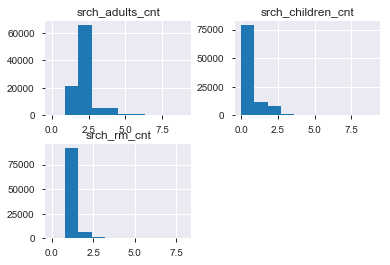

In [144]:
# if you don't want to use the above mentioned package & want to still plot the histogram you can manage it this way
# sample.hist()
sample[['srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist()

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


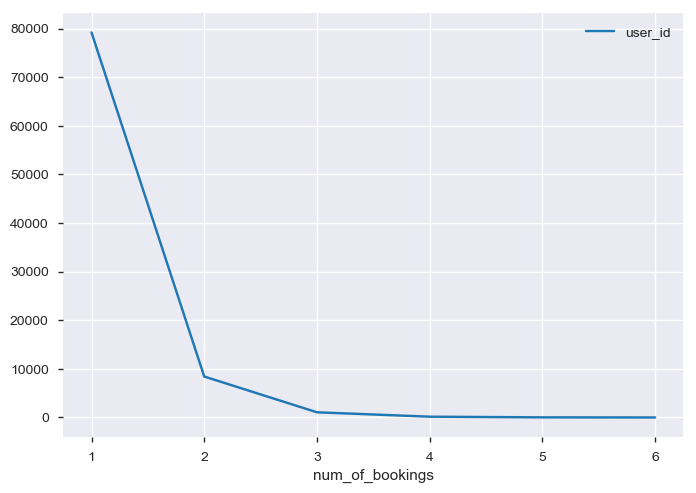

In [25]:
# lets check the distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count').reset_index().plot(x='num_of_bookings', y='user_id')

In [145]:
sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())

In [146]:
sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'target', 'count'], dtype='object')

In [147]:
sample.head(3)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,target,count
0,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,0,2
1,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,0,2
2,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,0,1


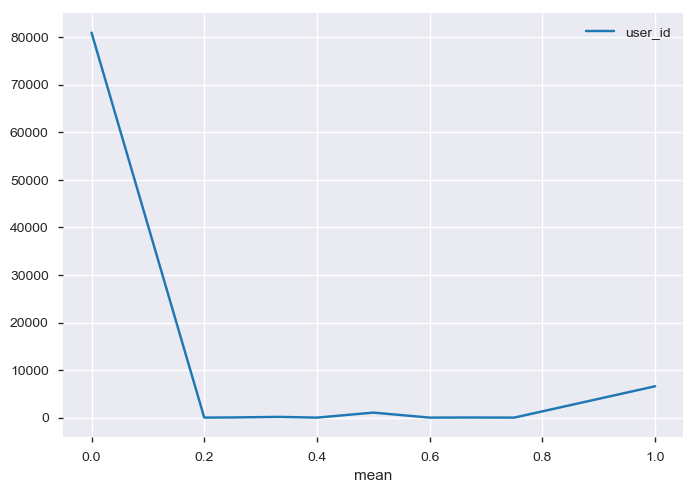

In [29]:
# lets check the distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index().plot(x='mean', y='user_id')

# explore the data for business logic validation #
HERE WE WILL VALIDATE 3 THINGS
1) Check-in date should be > booking_date
2) Check-out date should be > check-in date
3) No. of guests should be > 0 

In [148]:
# checking number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [149]:
# we see that there are invalid entries, we need to drop them
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index, inplace=True)

In [150]:
# reverifying the scenario
# checking number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,0,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [151]:
# convert to date time
sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

# filter cases where the condition fails: Check-out date need to be later than check-in date;
print(sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']].count())
print(sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']])

srch_co    2
srch_ci    2
dtype: int64
         srch_co    srch_ci
34410 2013-05-27 2013-08-20
42412 2015-05-09 2015-08-31


In [152]:
# filter cases where condition fails: Check-in date need to be later than booking date
print(sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']].count())
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

srch_ci    25
date       25
dtype: int64


,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


# create new features that might be useful - Feature Engineering #
We create new variables like the days of stay (duration), how many days in advance the booking was made (days_in_advance)

In [153]:
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

In [154]:
# apply the function on the dataset
sample['duration'] = sample.apply(duration, axis=1)

In [155]:
# check column duration entries
sample.duration.head(3)

0    4.0
1    5.0
2    1.0
Name: duration, dtype: float64

In [156]:
def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D') #Timedelta is a subclass of datetime.timedelta , it allows compatibility with np.timedelta64 & to convert to days we use (1,'D')
    if delta < 0:
        return np.nan
    else:
        return delta

In [157]:
# apply the function on the dataset
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

In [158]:
# check the column days_in_advance 
sample['days_in_advance'].head(3)

0    42.0
1    29.0
2     0.0
Name: days_in_advance, dtype: float64

# Objective1: Identify the underperforming / overperforming segments #
Based on booking rate

In [159]:
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

In [160]:
# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


    site_name  booking_rate  num_of_bookings
35         44      0.000000                0
10         16      0.000000                0
29         35      0.025362                7
27         33      0.036170               17
12         18      0.036603               25
1           6      0.037037                2
39         48      0.039216                2
15         21      0.041667                2
30         36      0.042017                5
26         32      0.050420               12
19         25      0.052727               29
37         46      0.055556                5
21         27      0.059259               16
13         19      0.060606                2
3           8      0.061588              152
20         26      0.062814               25
8          14      0.062937                9
17         23      0.064253              126
2           7      0.064935                5
33         40      0.066176                9
18         24      0.066398              428
5         

In [161]:
# recheck again the booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


,channel,booking_rate,num_of_bookings
7,7,0.043263,35
8,8,0.051852,14
3,3,0.060482,266
2,2,0.060583,474
6,6,0.068323,11
1,1,0.069568,713
0,0,0.072184,901
9,9,0.085365,4719
5,5,0.094533,581
4,4,0.120438,264


In [162]:
# this info is already available in our report provided by pandas_profiling
print(sample['is_booking'].mean())

0.07994911145392984


# TWO-SAMPLED t-test 
#### to understand the underperforming & overperforming segments

* We use Two sample t-test to check whether the outperformance is statistically significant, i.e., we have to check if is booking rate for city 1 greater than other cities. Hypothesis test for the equality of the booking rate in two binomial samples (One Segment vs. all other Segment)

* We calculate the z-score. To find the z-score of a sample, we need to find the mean, variance and standard deviation of the sample. To calculate the z-score, we will find the difference between a value in the sample and the mean, and divide it by the standard deviation.

* Then, we calculate the probability score. We then mark it as significant (1) if prob. score > 0.9 , 0 in other cases, while if prob. score < 0.1 then we mark it as "-1"

* if x < 0.1 -> Not enough samples to check significance so we mark "-1"
  if x > 0.9 -> we mark "1"
  else       -> we mark "0"

In [53]:
# functn for two-sampled t-test
def stats_comparison(i):
    cat = sample.groupby(i)['is_booking']\
        .agg({
            'sub_average': 'mean',
            'sub_bookings': 'count'
       }).reset_index()
    cat['overall_average'] = sample['is_booking'].mean()
    cat['overall_bookings'] = sample['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

In [54]:
stats_comparison('user_location_city')

       user_location_city  sub_average  sub_bookings  overall_average  overall_bookings  rest_bookings  rest_average   z_score      prob  significant
0                       0     0.000000             4         0.079949             99826          99822      0.079952 -0.589576  0.277738            0
1                       1     0.000000             2         0.079949             99826          99824      0.079951 -0.416889  0.338380            0
2                       3     0.235294            17         0.079949             99826          99809      0.079923  2.361816  0.990907            1
3                       7     0.000000             1         0.079949             99826          99825      0.079950 -0.294783  0.384080            0
4                       8     0.000000             1         0.079949             99826          99825      0.079950 -0.294783  0.384080            0
5                      14     0.000000             4         0.079949             99826          998

# Objective2: Focus on tailoring new marketing campaigns for different cities in the coming few months ahead. #
we want to undestand what cities we can focus on for setting campaigns

In [46]:
############## clustering - what are the similar user cities? ##############

# Step 1: what are the features we are going to use (that makes sense)?
# What features may distinguish cities? based on business sense and exploratory analysis

num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [47]:
city_groups.shape

(4530, 9)

In [48]:
city_groups.columns

Index(['user_location_city', 'duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], dtype='object')

In [49]:
city_groups.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.0,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.5,1.0


In [50]:
# Step 2: Standardise the data
# What is the magnitude of data range?
city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])

In [51]:
city_groups_std.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.656693,0.481213,0.323892,-0.595145,0.001781,-0.493112,-0.678922,-0.325831
1,3,0.573460,0.778136,1.090490,-0.319693,0.001781,-0.206798,0.253986,-0.325831


In [52]:
'''
K-MEANS ANALYSIS - INITIAL CLUSTER SET
'''
# Step 3: select clustering method and number of clusters
# The Elbow method choose a K so that the sum of the square error of the distances decrease drastically
# there are methods to help derive the optimal number for k
# k-means cluster analysis for 1-10 clusters in random at first                                                       
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=cluster.KMeans(n_clusters=k)
    model.fit(city_groups_std)
    clusassign=model.predict(city_groups_std)
    meandist.append(sum(np.min(cdist(city_groups_std, model.cluster_centers_, 'euclidean'), axis=1))
    / city_groups_std.shape[0])

Text(0.5,1,'Selecting k with the Elbow Method')

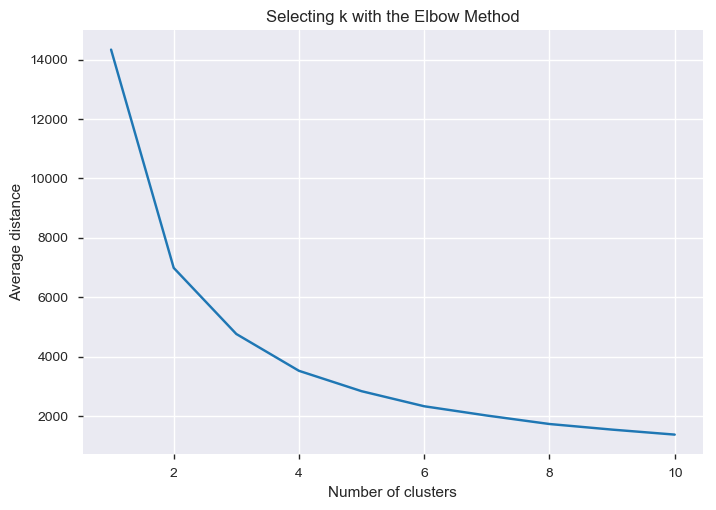

In [53]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

In [54]:
# Let us Interpret 3 cluster solution
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])

In [55]:
city_groups_std.columns

Index(['user_location_city', 'duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cluster'], dtype='object')

In [56]:
city_groups_std.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster
0,0,-0.656693,0.481213,0.323892,-0.595145,0.001781,-0.493112,-0.678922,-0.325831,0
1,3,0.573460,0.778136,1.090490,-0.319693,0.001781,-0.206798,0.253986,-0.325831,2


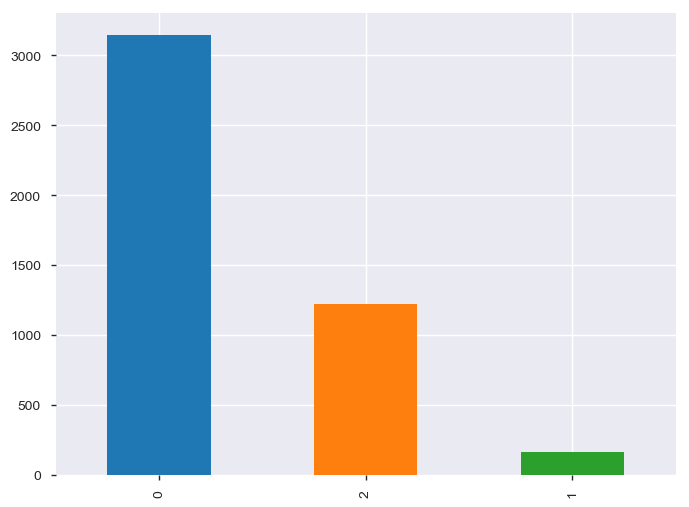

In [57]:
# check the cluster size population
plt.figure(figsize=(8, 6))
city_groups_std['cluster'].value_counts().plot.bar()

In [58]:
city_groups_std.columns

Index(['user_location_city', 'duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cluster'], dtype='object')

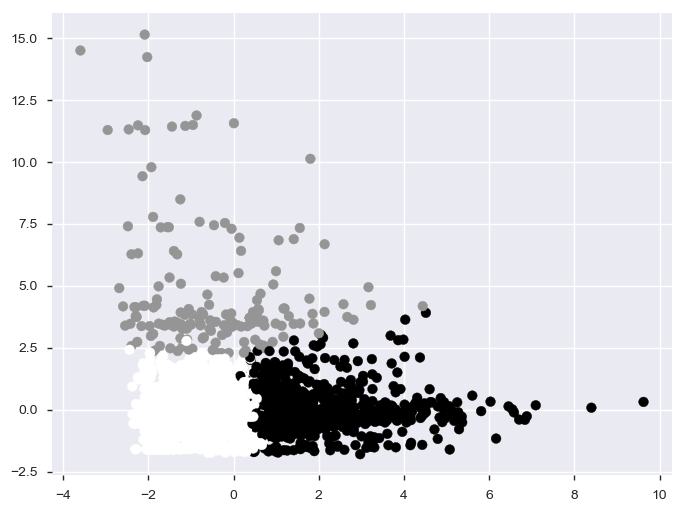

In [59]:
# Principal Component Analysis
pca = decomposition.PCA(n_components=2)
pca.fit(city_groups[num_list])
city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(city_groups_std['x'], city_groups_std['y'],c=city_groups_std['cluster'])
plt.show()

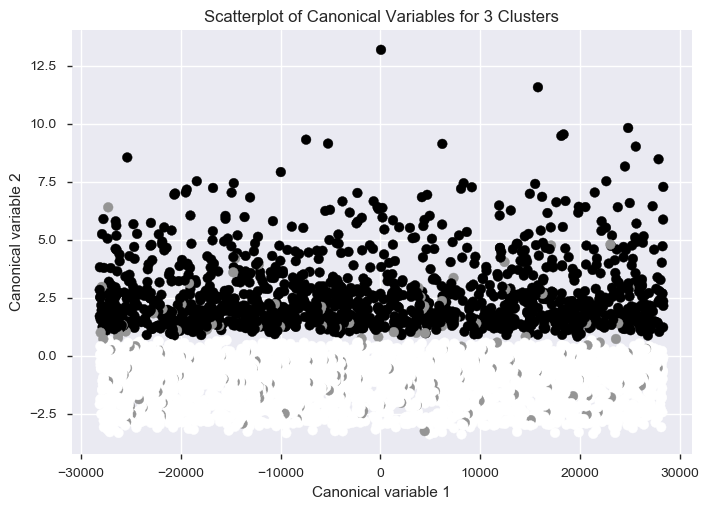

In [60]:
# other way to recheck
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(city_groups_std) # fit CA to the dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=km.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show() # close or overlapping clusters indicate correlated variables with low in-class variance, but not good separation. 
           # 2 cluster might be better or appropriate in such case.

In [61]:
city_groups_std.columns

Index(['user_location_city', 'duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cluster', 'x', 'y'], dtype='object')

In [62]:
city_groups_std.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.656693,0.481213,0.323892,-0.595145,0.001781,-0.493112,-0.678922,-0.325831,0,0.156383,-0.648808
1,3,0.573460,0.778136,1.090490,-0.319693,0.001781,-0.206798,0.253986,-0.325831,2,1.282385,-0.206335


In [63]:
# Step 4: profile the clusters
# merging the two dataframes based on a common column user_location_city
profile_cluster = city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column

In [64]:
profile_cluster

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28078.090822,2.708320,40.683836,1350.023351,0.142193,0.154893,1.983719,0.371443,1.071946
1,30959.031056,3.050725,56.982039,1595.925041,0.136077,0.187474,4.193789,0.562474,2.448965
2,28780.468033,5.112380,96.205157,2967.547017,0.116433,0.501739,2.023302,0.318128,1.070389


In [65]:
profile_cluster.columns

Index(['user_location_city', 'duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], dtype='object')

In [66]:
city_data.head(2)

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643


In [67]:
city_groups.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.0,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.5,1.0


In [68]:
city_groups_std.head(2)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.656693,0.481213,0.323892,-0.595145,0.001781,-0.493112,-0.678922,-0.325831,0,0.156383,-0.648808
1,3,0.573460,0.778136,1.090490,-0.319693,0.001781,-0.206798,0.253986,-0.325831,2,1.282385,-0.206335


In [69]:
# mapping cluster to city_data
city_data['clusters'] = city_groups_std['cluster']

In [70]:
city_data.head(2)

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city,clusters
0,4.0,42.0,456.1151,0,1,2,0,1,36643,0.0
1,5.0,29.0,454.4611,0,1,1,0,1,36643,2.0


In [71]:
sample.head(2)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,target,count,date,duration,days_in_advance
0,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,0,2,2014-11-03,4.0,42.0
1,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,0,2,2014-07-28,5.0,29.0


In [72]:
# check the user_location_city in each clusters
group = city_groups_std[['user_location_city','cluster']]
from collections import defaultdict
d = defaultdict(list)
for each in group.iterrows():
    d[each[1]['cluster']].append(each[1]['user_location_city'])

In [73]:
d

defaultdict(list,
            {0: [0,
              40,
              50,
              53,
              69,
              76,
              94,
              97,
              113,
              120,
              130,
              136,
              151,
              165,
              207,
              210,
              233,
              244,
              246,
              255,
              266,
              273,
              274,
              285,
              311,
              332,
              380,
              385,
              431,
              467,
              477,
              478,
              530,
              536,
              538,
              560,
              620,
              657,
              696,
              775,
              781,
              820,
              845,
              854,
              876,
              878,
              881,
              892,
              902,
              905,
              909,
              916,


In [74]:
# write to file
import csv
with open('user_location_city_by_cluster.csv', 'w') as f:  
    w = csv.writer(f)
    w.writerows(d.items())

# Objective3: Focus on how the user booking rate can be improved?
############### We need to understand what lead to a higher chance of booking for individuals? ###############

In [75]:
sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'target', 'count', 'date', 'duration', 'days_in_advance'], dtype='object')

In [76]:
# we will build a decision tree to understand what is that factor that pushes people to do booking
from sklearn.cross_validation import train_test_split

C:\Users\True\AppData\Roaming\Python\Python35\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
# choose a cluster 
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], left_on='user_location_city', right_on='user_location_city', how='outer')
sample.groupby('cluster')['is_booking'].count()

cluster
0.0    60930
1.0      323
2.0     8201
Name: is_booking, dtype: int64

In [78]:
# choose one of the city clusters to analyze, here we choose cluster 0 as it has most data points
tree_data = sample.dropna(axis = 0)[sample['cluster']==0]

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [79]:
# split into test and train
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])

In [80]:
# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])

In [81]:
# scoring of the prediction model
clf.score(tree_test[num_list], tree_test['is_booking'])

0.913865358894338

In [82]:
# explicitly reassign the path to be used with notebook
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
# visualize the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("booking_tree.pdf")

In [83]:
print(clf.tree_.feature)

[ 0  5  1  5  0 -2 -2 -2 -2 -2 -2]


In [84]:
print(clf.tree_.threshold)

[ 1.5  1.5 15.5  1.5  4.5 -2.  -2.  -2.  -2.  -2.  -2. ]


In [85]:
print(clf.tree_.value)

[[[40998.  3862.]]

 [[11489.  1818.]]

 [[29509.  2044.]]

 [[ 7899.   851.]]

 [[21610.  1193.]]

 [[ 2632.   599.]]

 [[ 8857.  1219.]]

 [[ 2055.   343.]]

 [[ 5844.   508.]]

 [[14119.   932.]]

 [[ 7491.   261.]]]


In [86]:
print(clf.tree_.children_left),print(clf.tree_.children_right)

[ 1  5  3  7  9 -1 -1 -1 -1 -1 -1]
[ 2  6  4  8 10 -1 -1 -1 -1 -1 -1]


(None, None)

In [87]:
# pseudocode adopted from stackoverflow
def get_pseudocode(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def parsetree(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                parsetree (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                parsetree (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        parsetree(left, right, threshold, features, 0)

In [88]:
get_pseudocode(clf, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'])

if ( duration <= 1.5 ) {
if ( srch_adults_cnt <= 1.5 ) {
return [[2632.  599.]]
} else {
return [[8857. 1219.]]
}
} else {
if ( days_in_advance <= 15.5 ) {
if ( srch_adults_cnt <= 1.5 ) {
return [[2055.  343.]]
} else {
return [[5844.  508.]]
}
} else {
if ( duration <= 4.5 ) {
return [[14119.   932.]]
} else {
return [[7491.  261.]]
}
}
}


# Objective3: Focus on how the user booking rate can be improved?
############### We need to understand what lead to a higher chance of booking for individuals? ###############

In [89]:
# we will build logistic regression model to examine what leads to people doing booking
sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'target', 'count', 'date', 'duration', 'days_in_advance', 'cluster'], dtype='object')

In [90]:
# check the statistics by channel for top5 results
# you can also use sample['channel'].value_counts() to get results. I just wanted to show another way
channel_stats = sample.groupby('channel').apply(lambda x: len(x))
channel_stats.nlargest(5)

channel
9    55280
0    12482
1    10249
2     7824
5     6146
dtype: int64

In [91]:
#create dummy variable channel
# we keep top5 channels as it is and put the rest as 'other'
sample['new_channel'] = [i if i in [9, 0, 1, 2,5] else 'other' for i in sample['channel']]

In [92]:
# check new_channel distribution
sample['new_channel'].value_counts()

9        55280
0        12482
1        10249
other     7845
2         7824
5         6146
Name: new_channel, dtype: int64

In [93]:
# one-hot encoding using pd.get_dummies
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')

In [94]:
dummy_channels

,channel_0,channel_1,channel_2,channel_5,channel_9,channel_other
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,1,0
6,0,1,0,0,0,0
7,0,0,0,0,0,1
8,0,0,0,1,0,0
9,0,0,0,1,0,0


In [95]:
# merge the newly encoding dummy variable to original sample file
sample = sample.join(dummy_channels.ix[:, :])

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [96]:
sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'target', 'count', 'date', 'duration', 'days_in_advance', 'cluster', 'new_channel', 'channel_0', 'channel_1', 'channel_2', 'channel_5', 'channel_9', 'channel_other'], dtype='object')

In [97]:
sample.head(2)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,target,count,date,duration,days_in_advance,cluster,new_channel,channel_0,channel_1,channel_2,channel_5,channel_9,channel_other
0,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,0,2,2014-11-03,4.0,42.0,2.0,1,0,1,0,0,0,0
1,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,0,2,2014-07-28,5.0,29.0,2.0,9,0,0,0,0,1,0


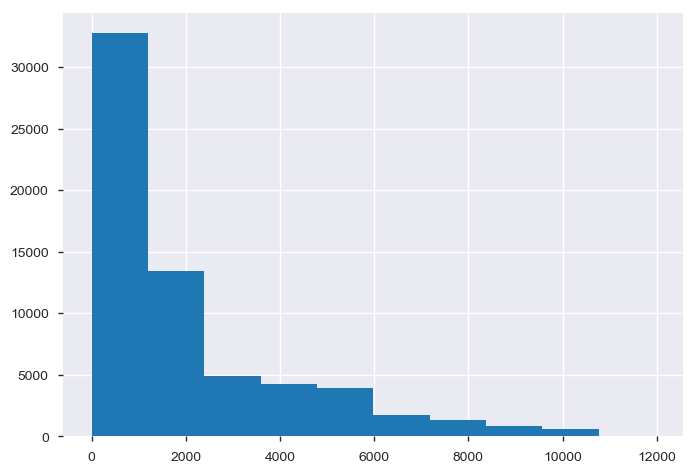

In [99]:
# check orig_destination_distance distribution
sample['orig_destination_distance'].hist()

In [100]:
# we do log transformation to make highly skewed distributions less skewed
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]

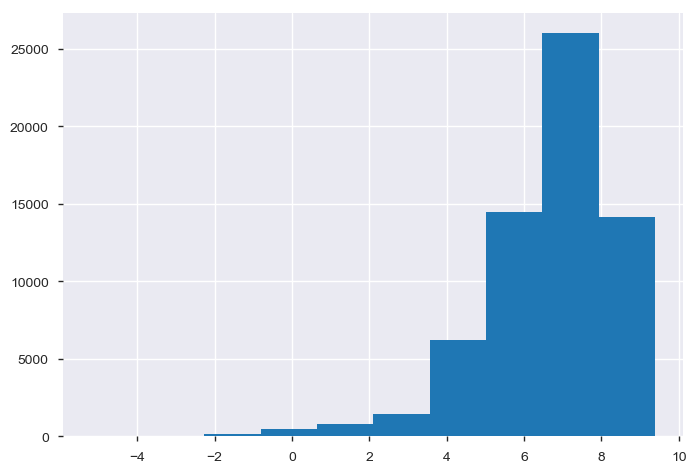

In [101]:
# check distribution of newly created variable with log transformation
sample['log_orig_destination_distance'].hist()

In [102]:
# select features
var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_0', 'channel_1', 'channel_2', 'channel_5', 
            'channel_9', 'channel_other']

In [103]:
# create a logistic estimator
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.274319
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                63473
Model:                          Logit   Df Residuals:                    63459
Method:                           MLE   Df Model:                           13
Date:                Sat, 27 Oct 2018   Pseudo R-squ.:                 0.04459
Time:                        15:58:21   Log-Likelihood:                -17412.
converged:                       True   LL-Null:                       -18225.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
duration                         -0.1735      0.009    -18.387      0.000      -0.192      -0.155
days_in_advance                  -0.0040      0.000    -12.097      0.000      -0.005      -0.003
log_orig_destination_distance     0.0130      0.009      1.511      0.131      -0.004       0.030
is_mobile                        -0.2846      0.048     -5.989      0.000      -0.378      -0.191
is_package                       -0.4087      0.046     -8.922      0.000      -0.498      -0.319
srch_adults_cnt                  -0.2264      0.019    -11.776      0.000      -0.264      -0.189
srch_children_cnt                -0.1100      0.021     -5.152      0.000      -0.152      -0.068
srch_rm_cnt                       0.2552      0.031      8.135      0.000       0.194       0.317
channel_0                        -1.5755      0.078    -20.218      0.000      -1.728      -1.423
channel_1                        -1.6467      0.084    -19.672      0.000      -1.811      -1.483
channel_2                        -1.7904      0.089    -20.077      0.000      -1.965      -1.616
channel_5                        -1.2909      0.095    -13.636      0.000      -1.476      -1.105
channel_9                        -1.4743      0.069    -21.413      0.000      -1.609      -1.339
channel_other                    -1.5613      0.089    -17.541      0.000      -1.736      -1.387
=================================================================================================
"""

In [107]:
result.params

duration                        -0.173504
days_in_advance                 -0.004009
log_orig_destination_distance    0.012985
is_mobile                       -0.284625
is_package                      -0.408677
srch_adults_cnt                 -0.226428
srch_children_cnt               -0.110050
srch_rm_cnt                      0.255152
channel_0                       -1.575467
channel_1                       -1.646664
channel_2                       -1.790376
channel_5                       -1.290868
channel_9                       -1.474324
channel_other                   -1.561336
dtype: float64

In [104]:
# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
duration,0.825308,0.856407,0.840714
days_in_advance,0.995353,0.996647,0.995999
log_orig_destination_distance,0.996146,1.030281,1.013070
is_mobile,0.685392,0.825732,0.752296
is_package,0.607467,0.726950,0.664529
srch_adults_cnt,0.767887,0.827999,0.797377
srch_children_cnt,0.859064,0.934086,0.895790
srch_rm_cnt,1.213708,1.372487,1.290658
channel_0,0.177605,0.241052,0.206911
channel_1,0.163536,0.227045,0.192692


In [111]:
# predicted values
sample['pred'] = result.predict(sample[var_list])

In [112]:
# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()

channel
0     0.072184
1     0.069568
2     0.060583
3     0.060482
4     0.120438
5     0.094533
6     0.068323
7     0.043263
8     0.051852
9     0.085365
10    0.200000
Name: is_booking, dtype: float64

In [113]:
def plot_booking_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], 
                             values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


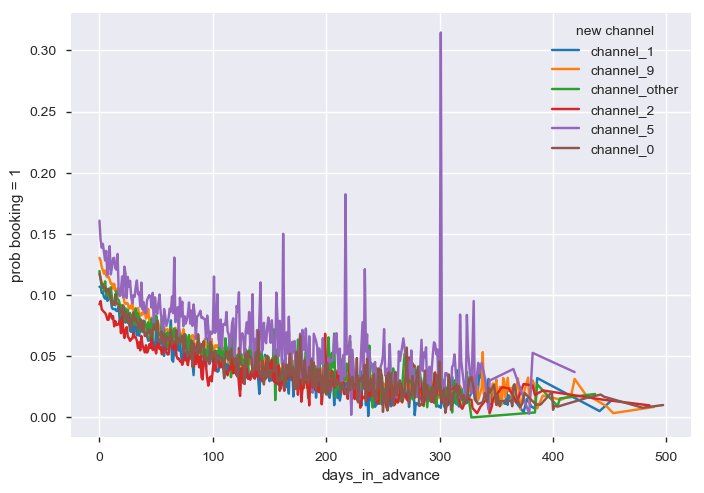

In [114]:
plot_booking_vs_marketing_channel('days_in_advance')

In [119]:
def plot_booking_vs_isPackage(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], 
                             values = ['pred'], index=[variable, 'is_package'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.is_package.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['is_package_'+str(i) for i in list(sample.is_package.unique())], loc='upper right', title='Cust has taken package')

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


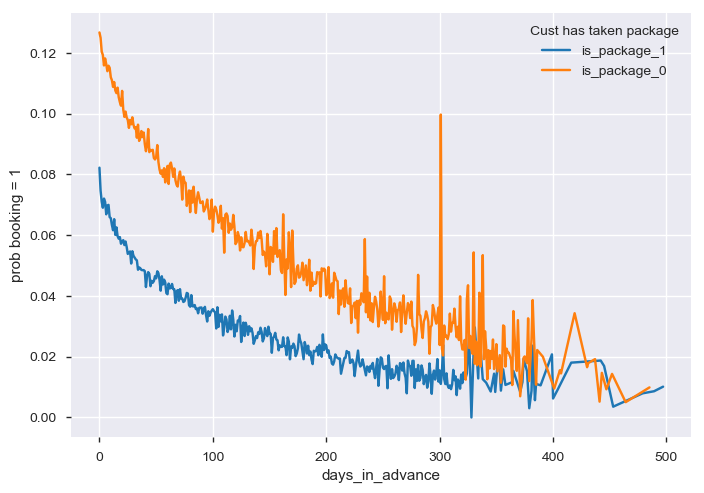

In [120]:
plot_booking_vs_isPackage('days_in_advance')

In [121]:
def plot_booking_vs_isMobile(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], 
                             values = ['pred'], index=[variable, 'is_mobile'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.is_mobile.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['is_mobile_'+str(i) for i in list(sample.is_mobile.unique())], loc='upper right', title='Booking done using mobile')

C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\True\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


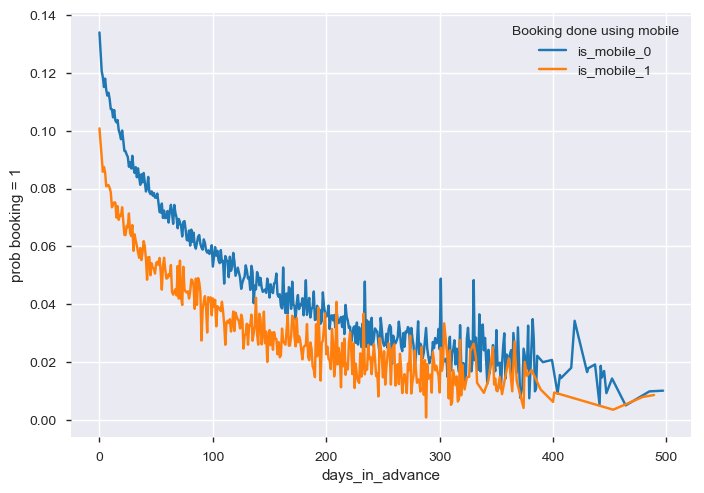

In [122]:
plot_booking_vs_isMobile('days_in_advance')